In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
#grab datafile using pandas
dataFrame = pd.read_csv("yeast.data", delim_whitespace=1, names=["mcg","gvh","alm","mit","erl","pox","vac","nuc","class"])
#print(dataFrame)
#Problem 1
#outlier detection using Isolation Forest:
df = dataFrame.drop(columns="class")
dfOnlyClasses = dataFrame.drop(columns=["mcg","gvh","alm","mit","erl","pox","vac","nuc"])
IF = IsolationForest(n_estimators=8)
IF.fit(df)
#negative values are outliers
#outliersWithIF = [x for x in IF.predict(df) if x<0]
#print(len(outliersWithIF))
#find outliers and remove them
count = 0
for x in IF.predict(df):
    if x < 0 and count < len(df):
        df = df.drop(df.index[count])
        dfOnlyClasses = dfOnlyClasses.drop(dfOnlyClasses.index[count])
    count = count + 1
print(df)
print(dfOnlyClasses)

#outlier dectection using one-class SVM
OCSVM = OneClassSVM(gamma='auto').fit(dataFrame.drop(columns="class"))
#negative values are outliers
outliersWithOCSVM = [x for x in OCSVM.predict(dataFrame.drop(columns="class")) if x < 0]
print(len(outliersWithOCSVM))

C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


             mcg   gvh   alm   mit  erl  pox   vac   nuc
ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22
ABC1_YEAST  0.50  0.54  0.48  0.65  0.5  0.0  0.53  0.22
BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.0  0.58  0.34
ABF2_YEAST  0.55  0.50  0.66  0.36  0.5  0.0  0.49  0.22
ABP1_YEAST  0.40  0.39  0.60  0.15  0.5  0.0  0.58  0.30
ACE1_YEAST  0.43  0.39  0.54  0.21  0.5  0.0  0.53  0.27
ACE2_YEAST  0.42  0.37  0.59  0.20  0.5  0.0  0.52  0.29
ACH1_YEAST  0.40  0.42  0.57  0.35  0.5  0.0  0.53  0.25
ACON_YEAST  0.60  0.40  0.52  0.46  0.5  0.0  0.53  0.22
ACR1_YEAST  0.66  0.55  0.45  0.19  0.5  0.0  0.46  0.22
ACT_YEAST   0.46  0.44  0.52  0.11  0.5  0.0  0.50  0.22
ACT2_YEAST  0.47  0.39  0.50  0

Train on 804 samples, validate on 90 samples
Epoch 1/15
804/804 [==============================] - 0s 330us/step - loss: 0.2171 - accuracy: 0.2898 - val_loss: 0.2147 - val_accuracy: 0.3000
Epoch 2/15
804/804 [==============================] - 0s 147us/step - loss: 0.2123 - accuracy: 0.2898 - val_loss: 0.2101 - val_accuracy: 0.3000
Epoch 3/15
804/804 [==============================] - 0s 162us/step - loss: 0.2078 - accuracy: 0.2898 - val_loss: 0.2056 - val_accuracy: 0.3000
Epoch 4/15
804/804 [==============================] - 0s 221us/step - loss: 0.2034 - accuracy: 0.2898 - val_loss: 0.2013 - val_accuracy: 0.3000
Epoch 5/15
804/804 [==============================] - 0s 131us/step - loss: 0.1991 - accuracy: 0.2898 - val_loss: 0.1971 - val_accuracy: 0.3000
Epoch 6/15
804/804 [==============================] - 0s 126us/step - loss: 0.1950 - accuracy: 0.2898 - val_loss: 0.1931 - val_accuracy: 0.3000
Epoch 7/15
804/804 [==============================] - 0s 146us/step - loss: 0.1910 - accura

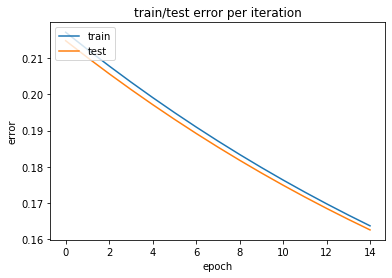

In [3]:
#Problem 2
#import what's needed to build ann
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#encode classes using one hot encoder:
enc = OneHotEncoder()
enc.fit(dfOnlyClasses)
OneHotEncoder(categorical_features=None, categories=None, drop=None, handle_unknown='ignore', n_values=None)
y = enc.transform(dfOnlyClasses).toarray()
#print(y) #test

#split data into training and testing:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.34, random_state=42)
#print(X_train) #test
#build ann model using keras:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_dim=8))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
#comile the model:
model.compile(
  optimizer='sgd',
  loss='mean_squared_error',
  metrics=['accuracy'],
)
#create checkpoint for plot, to grab val_loss
filepath="weights-improvement-{epoch:04d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]
#fit the model with training set:
history = model.fit(
  X_train,
  y_train,
  epochs=15,
  batch_size=10, 
  verbose=1,
  validation_split=0.1
)
print(history.history.keys())
#test model using training set:
model.evaluate(
  X_test,
  y_test
)
model.save_weights('model.h5')
#get weights and biases from output layer to plot:
from tensorflow.contrib.keras import layers
output_layer_weights = model.layers[3].get_weights()[0]
output_layer_biases  = model.layers[3].get_weights()[1]
#print(output_layer_weights) #test
#print(output_layer_biases) #test

import matplotlib.pyplot as plt
#plot the weights:

#plot the training and testing error:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train/test error per iteration')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()











In [18]:
#Problem 3
#create df including all data as stated in directions
dataFrameWithAllData = pd.read_csv("yeast.data", delim_whitespace=1, names=["mcg","gvh","alm","mit","erl","pox","vac","nuc","class"])
#print(dataFrame)
#Problem 1
#outlier detection using Isolation Forest:
#def = dataframeeverything
dfe = dataFrameWithAllData.drop(columns="class")
#grab classes for model:
cdfe = dataFrameWithAllData.drop(columns=["mcg","gvh","alm","mit","erl","pox","vac","nuc"])
#print(cdfe) #test
#print(dfe) #test
#use new one hot encoder for new y column vector
newenc = OneHotEncoder()
newenc.fit(cdfe)
OneHotEncoder(categorical_features=None, categories=None, drop=None, handle_unknown='ignore', n_values=None)
y = enc.transform(cdfe).toarray()
import numpy as np
np.set_printoptions(threshold=np.inf)
y = np.array(y)
print(y) #test
#Train model with all data
#it will show less in model because I am using 0.1 for validation
history = model.fit(
  dfe,
  y,
  epochs=15,
  batch_size=10, 
  verbose=1,
  validation_split=0.1
)



[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


AttributeError: 'OneHotEncoder' object has no attribute '_active_features_'